# PART 1: CORRELATION STUDY



### 1.1 - Study the correlation between the ground truth data and the Google Trends data. Explore multiple features of the ground truth data (e.g., crude prevalence, age-adjusted prevalence, etc.), and multiple keywords or entity types for querying the Google Trends data. Check for stability (or lack there of) across different years.

#### In the last script, we described the disposition in which we saved ground truth data and digital proxy data (tables of queries for each category separated by years) .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 10000)

path = 'D:/DataScience/DE/HW02/'
years = list(range(2011,2017))

states = pd.read_csv(path+'TrueData/TrueData2011.csv', sep = ';')['LocationDesc'][:55]

# GROUND TRUTH (crude prevalence)
GT = pd.DataFrame(index = states)

for y in years: 
    
    df = pd.read_csv(path+'TrueData/TrueData'+str(y)+'.csv', sep = ';')
    df = df.replace('*',np.nan)
    df['Data_Value'] = pd.to_numeric(df['Data_Value'])
    df = df.set_index('LocationDesc')
    GT[str(y)] = df['Data_Value'][df['Data_Value'].notnull()]
    
# GROUND TRUTH (age-adjusted prevalence)
GT2 = pd.DataFrame(index = states)

for y in years:
    
    df = pd.read_csv(path+'TrueData/TrueData2_'+str(y)+'.csv', sep = ';')
    df = df.replace('*',np.nan)
    df['Data_Value'] = pd.to_numeric(df['Data_Value'])
    df = df.set_index('LocationDesc')
    GT2[str(y)] = df['Data_Value'][df['Data_Value'].notnull()]

    
states = set(states).difference(['All States, DC and Territories (median) **', 'All States and DC (median) **', 
                                      'Guam', 'Puerto Rico'])
states = sorted(list(states))

categories = [0,45,419,429]
cat_names = ['all categories', 'health', 'health conditions', 'cancer']

In [2]:
GT.loc[states]  #Table of Ground Truth Data

,2011,2012,2013,2014,2015,2016
LocationDesc,,,,,,
Alabama,8.3,7.7,8.2,8.2,8.2,8.4
Alaska,3.0,2.8,3.0,3.2,3.0,2.7
Arizona,6.9,7.2,8.0,8.3,8.1,8.1
Arkansas,6.0,7.0,7.3,6.6,6.6,7.5
California,5.8,5.2,5.1,4.8,5.1,5.0
Colorado,6.1,6.0,6.4,6.3,6.5,6.5
Connecticut,5.7,5.6,5.8,5.8,5.7,5.5
Delaware,6.5,6.4,6.8,6.7,7.3,6.4
District of Columbia,2.8,2.3,2.6,2.9,3.5,3.3


In [3]:
#dictionary with categories as key 
GoogleTrends = {}

for cat in categories:
    
    GoogleTrends[str(cat)] = {}
    
    f = open(path+'GoogleTrends/keywords(new)'+str(cat)+'.txt','r') 
    keywords = f.read().split('-')[:-1]
    
    for kw in keywords:
                            #Inside the dictionary another dictionary with query as key 
        GoogleTrends[str(cat)][kw] = pd.DataFrame()
    
    for year in range(len(years)):
        #read queries from file 
        df = pd.read_excel(path+'GoogleTrends/QUERIES(new)-cat'+str(cat)+'.xlsx', sheetname = year)
        df = df.fillna(0)
        df = df.set_index('LocationDesc')
        
       
        for kw in keywords:
            #create the final structure
            GoogleTrends[str(cat)][kw][years[year]] = df[kw]

            


In [4]:
GoogleTrends['0']['Melanoma'].loc[states]  #Example of the final structure

,2011,2012,2013,2014,2015,2016
LocationDesc,,,,,,
Alabama,89.0,72.0,78.0,84.0,89.0,85.0
Alaska,52.0,39.0,51.0,57.0,55.0,59.0
Arizona,54.0,70.0,64.0,66.0,73.0,75.0
Arkansas,85.0,85.0,63.0,70.0,71.0,79.0
California,52.0,57.0,55.0,60.0,57.0,61.0
Colorado,56.0,63.0,64.0,63.0,61.0,71.0
Connecticut,74.0,72.0,78.0,74.0,78.0,84.0
Delaware,67.0,82.0,72.0,58.0,73.0,64.0
District of Columbia,53.0,58.0,54.0,65.0,62.0,79.0


#### We created a class with all the function required to study the correlation between queries values and the target variable. All the function are full commented in the following script(2).Studying the correlation we would like to perform variables selection, taking abviously all the queries that could add more information to our regression model.

#### The main idea is to calculate the correlation between the target variable and each query, but the structure looks confused because we are considering 4 different categories. Since one of the assigment requested is about discussing generalisability across states and years, we determined the category where to take data from, using the functions corr and corr_temp from script(2).

#### Corr function defines a correlation coefficient between a vector of query values over all the states for each year and the corresponding vector in GT data over all the states for each year.

#### Corr Temp function defines a correlation coefficient between a vector of a query values taking over all the years for one state and the corresponding vector in the GT data over the years. In this case we were studing the correlation across the years for each state.

#### The aim of cat function is to select the category of a query, for all the queries, for which the highest correlation with the target variable has been provided.

#### new_df and newdf_temp define the final disposition of our data to be used in the setting up of the regression model. Tables are printed after the script (2).


In [5]:
#Script 2
class Correlation_Study:
    def __init__(self, categories, cat_names, path, states, years = list(range(2011,2017)), GroundTruth = None):
        self.GT = GroundTruth
        self.categories = categories
        self.cat_names = cat_names
        self.path = path
        self.years = years
        self.CORR = None # a list of dataframes, for each category
        self.corr_cats = None # a dataframe for the average correlation
        self.def_KWs = None # for each category, the queries over the given threshold
        self.ncorr_cats = None # new dataframe with only previously selected queries
        self.queries = None # best queries, union of all categories
        self.bc = None # for each keyword, the best category
        self.NCORR = None 
        self.GoogleTrends = None

    def correlation(self, cat, kw_list):
        
        Corr = []
        
        for year in range(len(self.years)):
            
            df = pd.read_excel(self.path+'GoogleTrends/QUERIES(new)-cat'+str(cat)+'.xlsx', sheetname = year)
            df = df.set_index(['LocationDesc'])#set states as indeces 
            df = df[kw_list]  #select the queries in kw_list
           
            #merge with states in GTdata
            m = pd.merge(self.GT.loc[states,[str(self.years[year])]], df, how = 'left', left_index = True, right_index = True)
            m = m.fillna(0) #fill missing values with zeros
            
            Corr += [np.corrcoef(m,rowvar = False)[0][1:]]
        #it returns the dataframe with all the correlation    
        return(Corr)

    def corr(self):
        
        self.CORR = []
        
        for cat,cn in zip(self.categories,self.cat_names):
            
            f = open(self.path+'GoogleTrends/keywords(new)'+str(cat)+'.txt','r') 
            kw_list = f.read().split('-')[:-1]
    
            self.CORR += [pd.DataFrame(np.array(self.correlation(cat,kw_list)), columns = kw_list, index = self.years)]
            #for each query, mean of all the states year by year
            self.CORR[-1].loc['Mean (by query)'] = np.mean(self.CORR[-1],axis=0) 
            self.CORR[-1]['Mean (by year)'] = np.mean(self.CORR[-1].fillna(0),axis=1)#for each year, mean among queries
            self.CORR[-1]['CATEGORY'] = [cn]*self.CORR[-1].shape[0]#
            
            
            # rows are years, cols are queries
        self.corr_cats = pd.concat([cat.loc['Mean (by query)'] for cat in self.CORR], axis = 1).T 
                                    #mean by query from the last table
        self.corr_cats = self.corr_cats.set_index('CATEGORY')
        return(self.corr_cats)
    
    def corr_temp(self,GTn,GoogleTrends,states): 
    
    #Correlation between a vector of a query taking all the years for one state and the corresponding vector in the GT data
        self.CORR = []

        for cat,cn in zip(self.categories,self.cat_names):
            C = {kw: [] for kw in GoogleTrends[str(cat)]}
            
            for state in states:
                
                for kw in GoogleTrends[str(cat)]:
                    
                    y = GTn.loc[state]
                    x = GoogleTrends[str(cat)][kw].loc[state]
                    C[kw] += [np.corrcoef(x,y)[0][1]]
                    
            C['State'] = states
            C = pd.DataFrame(C)
            C = C.set_index('State')
            
            self.CORR += [C]
            #self.CORR[-1] = self.CORR[-1].fillna(0)
            self.CORR[-1].loc['Mean (by query)'] = np.mean(self.CORR[-1].fillna(0),axis=0)
            self.CORR[-1]['Mean (by state)'] = np.mean(self.CORR[-1],axis=1)
            self.CORR[-1]['CATEGORY'] = [cn]*self.CORR[-1].shape[0]
            
            
        self.corr_cats = pd.concat([cat.loc['Mean (by query)'] for cat in self.CORR], axis = 1).T
        self.corr_cats = self.corr_cats.set_index('CATEGORY')
        #self.corr_cats = self.corr_cats.fillna(np.nan)
        self.GoogleTrends = GoogleTrends
        
        return(self.corr_cats)
    
    # best keywords for each category
    def cat(self, threshold): 
        
        #For each category take just queries with correlation in abs functio greater than a threshold
        self.def_KWs = []
        
        for cn in self.cat_names:
            
            cols = self.corr_cats.columns[abs(self.corr_cats.loc[cn])>threshold]
            cols = set(cols).difference(['Mean (by year)']).difference(['Mean (by state)'])
            self.def_KWs += [cols]
            
        return(self.def_KWs)  #list of list for each query divided by categories
    
    def newcorr(self,temp=False):
        
        meancol = 'Mean (by year)'
        
        if temp: meancol = 'Mean (by state)'
        self.queries = set(self.def_KWs[0])
        
        #threshold outdated for the a query in at least one category 
        for kws in self.def_KWs: self.queries = self.queries.union(kws)
            
        self.ncorr_cats = self.corr_cats.loc[:,list(self.queries)]
        self.ncorr_cats[meancol] = np.mean(self.ncorr_cats,axis=1)
        self.ncorr_cats = self.ncorr_cats.loc[:,[meancol]+list(self.queries)]
        
        #looking for the best category for each query 
        self.bc = np.argmax(np.abs(self.ncorr_cats.fillna(0).values), axis = 0)[1:] 
        
        return(self.ncorr_cats)
    
    
    def newdf(self, name=''):
        
        d = {str(cat): [] for cat in range(len(self.categories))}
        for cat,kw in zip(self.bc,self.queries):
            d[str(cat)] += [kw]
            
        writer = pd.ExcelWriter(path+'GoogleTrends/QUERIES(new)'+name+'.xlsx')
        
        for year in range(len(self.years)):
            
            DFs = []
            
            for cat in list(d.keys()):
                df = pd.read_excel(self.path+'GoogleTrends/QUERIES(new)-cat'+str(self.categories[int(cat)])+'.xlsx', sheetname = year)
                df = df.set_index(['LocationDesc'])
                DFs += [df[d[cat]]]
            
            db = pd.concat(DFs, axis = 1)
            db.to_excel(writer, str(self.years[year]), index = True)
        writer.save()
        # new corr
        self.NCORR = []
        
        for cat in list(d.keys()):
            #print(self.CORR[int(cat)][d[cat]])
            self.NCORR += [self.CORR[int(cat)][d[cat]]]
        self.NCORR = pd.concat(self.NCORR, axis = 1)
        return(self.NCORR)#create new table for all the queries chosen divided year by year
    
    
    def newdf_temp(self, name=''):
        d = {str(cat): [] for cat in range(len(self.categories))}
        
        for cat,kw in zip(self.bc,self.queries):
            d[str(cat)] += [kw]
        writer = pd.ExcelWriter(path+'GoogleTrends/QUERIES(new)'+name+'.xlsx')
        
        for year in range(len(self.years)):
            DFs = []
            
            for cat in list(d.keys()):
                
                df = pd.read_excel(self.path+'GoogleTrends/QUERIES(new)-cat'+str(self.categories[int(cat)])+'.xlsx', sheetname = year)
                df = df.set_index(['LocationDesc'])
                DFs += [df[d[cat]]]
            db = pd.concat(DFs, axis = 1)
            db.to_excel(writer, str(self.years[year]), index = True)
            
        writer.save()
        # new corr
        self.NCORR = []
        
        for cat in list(d.keys()):
            
            self.NCORR += [self.CORR[int(cat)][d[cat]]]
        self.NCORR = pd.concat(self.NCORR, axis = 1)
        self.NCORR = self.NCORR.fillna(np.nan)
        return(self.NCORR)


### CRUDE PREVALENCE 

#### we started using GT skin cancer data considering the entry  called "crude prevalence". 

In [6]:
#call class to use all the functions described above
CS = Correlation_Study(categories, cat_names, path, states, GroundTruth = GT)

# we first build the correlation matrix 
cm = CS.corr() 

# we then want to save only the queries where the average correlation is higher than 0.25
kws = CS.cat(threshold = .25)

# we can then have the new correlation matrix
cm2 = CS.newcorr()

# and we can finally save the new data
CORR = CS.newdf()

# let's sort the queries
CORR = CORR.T.sort_values('Mean (by query)', ascending = False).T

In [7]:
cm    #all the queries avarage for each state over the years

,Abscess,Australia,Biopsy,Blister,Boil,Cancer,Candidiasis,Carcinoma,Cellulitis,Chemotherapy,Chromosome,Contact dermatitis,Dermatology,Dermis,EMedicine,Folliculitis,Food and Drug Administration,Gene,Hemangioma,Interferon,Intestines,Latin America,Lymph nodes,Lymphocyte,MRI,Mean (by year),Melanoma,Metastasis,Mitosis,Morbidity,Mutation,Onychomycosis,P53,Paronychia,Pathology,Prednisone,Prognosis,Protein,Psoriasis,Radiation therapy,Skin Care,Skin cancer,Skin sun,Syphilis,Tinea versicolor,Tumor,Urticaria,Vitamin D,Wart,Wayback Machine,White people,sunburn,sunscreen,white spots
CATEGORY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
all categories,0.258959,-0.308645,0.151331,0.0592073,0.156849,0.180101,0.0219886,0.372392,0.212819,0.131909,0.142619,0.142516,0.29063,0.0781516,0.121739,0.0388293,-0.220294,0.109827,0.0983865,0.193514,0.19445,-0.23951,0.21972,0.0939969,0.0460063,0.092983,0.35393,0.143576,0.22964,-0.039998,0.0408524,0.209432,-0.118904,0.0605963,0.061114,0.302454,0.16388,-0.0509284,0.0994186,0.0320842,-0.0665215,0.345976,-0.019536,-0.0337014,0.113494,0.200335,0.114929,-0.0271283,0.0397061,0.00924059,-0.047312,0.105428,-0.0544665,0.213015
health,0.268549,-0.211685,0.203542,0.0477922,0.0508788,0.208204,0.0761215,0.394291,0.198737,0.110518,0.0819729,0.190488,0.178459,NaN,0.0473438,0.0654482,NaN,-0.0141597,0.0693602,0.201235,0.1656,NaN,0.17659,0.135386,0.0493483,0.102916,0.343628,0.170202,0.0602949,-0.0796594,-0.0145951,NaN,-0.123275,NaN,0.0516546,0.271296,0.163393,-0.0209919,0.0849591,-0.00235508,0.0568948,0.384879,NaN,-0.0131613,0.132305,0.224619,0.173155,0.030401,-0.103755,NaN,0.0509883,0.135278,-0.0743338,0.138283
health conditions,0.0604215,-0.226428,0.115059,0.016684,0.014374,0.232509,0.0678848,0.393735,0.191097,0.10197,0.106736,0.133282,0.208204,NaN,0.0840518,0.0640834,NaN,-0.0533024,0.109156,0.110185,0.12512,NaN,0.126786,0.120366,0.149119,0.105352,0.271858,0.0642562,0.0406214,NaN,0.0385984,NaN,NaN,NaN,0.0685521,0.222461,0.250999,0.0777873,0.0579946,NaN,0.0779576,0.368419,NaN,-0.0862291,NaN,0.174865,0.160797,0.142617,-0.090677,NaN,NaN,0.14216,NaN,-0.0200332
cancer,NaN,NaN,0.00770682,NaN,NaN,0.112549,NaN,0.337499,NaN,0.0825759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0209045,NaN,NaN,NaN,NaN,0.116405,NaN,NaN,0.136799,0.273864,0.14031,NaN,NaN,0.0155368,NaN,NaN,NaN,NaN,NaN,0.119907,NaN,NaN,NaN,NaN,0.32236,NaN,NaN,NaN,0.0919714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cm2 #best category sorted

,Mean (by year),Australia,Skin cancer,Melanoma,Dermatology,Carcinoma,Prognosis,Abscess,Prednisone
CATEGORY,,,,,,,,,
all categories,0.222447,-0.308645,0.345976,0.35393,0.29063,0.372392,0.16388,0.258959,0.302454
health,0.224101,-0.211685,0.384879,0.343628,0.178459,0.394291,0.163393,0.268549,0.271296
health conditions,0.193709,-0.226428,0.368419,0.271858,0.208204,0.393735,0.250999,0.0604215,0.222461
cancer,0.263408,NaN,0.32236,0.273864,NaN,0.337499,0.119907,NaN,NaN


In [9]:
CORR  #table with all the queries considered 

,Carcinoma,Skin cancer,Melanoma,Prednisone,Dermatology,Abscess,Prognosis,Australia
2011,0.358588,0.368001,0.229991,0.309761,0.268280,0.283767,0.200940,-0.279449
2012,0.458364,0.353761,0.525563,0.313955,0.321918,0.211986,0.244973,-0.289448
2013,0.396098,0.484559,0.288387,0.253655,0.158078,0.267591,0.297690,-0.251767
2014,0.270958,0.423005,0.351025,0.265124,0.346186,0.266445,0.185755,-0.330376
2015,0.395986,0.302686,0.363095,0.282890,0.334441,0.244907,0.236046,-0.314651
2016,0.485754,0.377263,0.365517,0.389342,0.314874,0.336599,0.340588,-0.386181
Mean (by query),0.394291,0.384879,0.353930,0.302454,0.290630,0.268549,0.250999,-0.308645


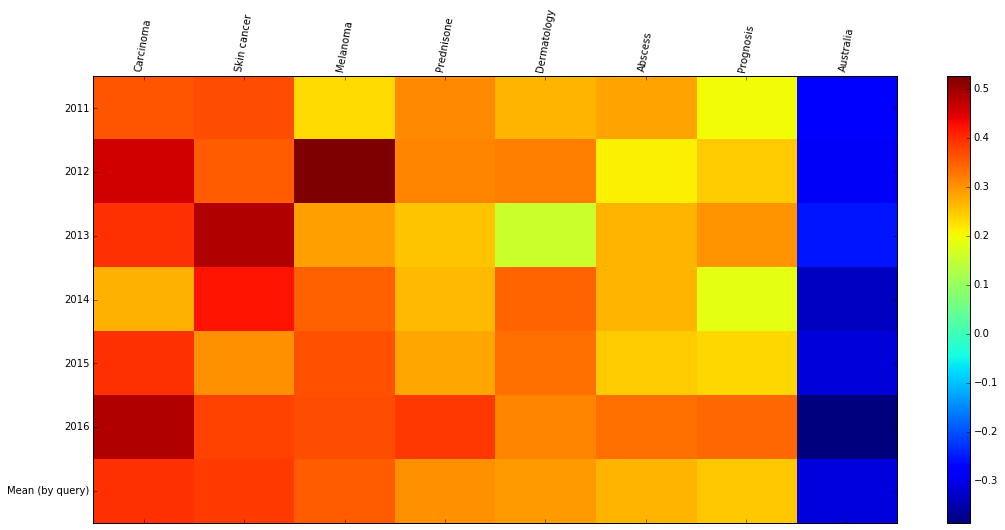

Range correlation coefficients: 0.525562608752 -0.386180974614


In [10]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(CORR.values, interpolation='nearest', aspect="auto")  
fig.colorbar(cax)

ax.set_xticks(list(range(len(CORR.columns))))
ax.set_yticks(list(range(len(CORR.index))))
ax.set_xticklabels(list(CORR.columns))  
ax.set_yticklabels(list(CORR.index))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=80)
plt.show()

print("Range correlation coefficients:",CORR.values.max(), CORR.values.min())

#### The last plot shows the correlation between the vector of a query considering all the state in one year with the GT target. The correlation coefficients are in a range between 0.525 e -0.386. The correlation coefficient don't follow a continuity over the years but the coefficient in most of the cases shows a correlation range between 0.5 and 0.2. The only query that follows remarkable continuity among those 6 years is "Australia", but we are aware that it's not linked with our chronic condition.

#### From boxplot we can realize that there is a considerable variability in terms of correlation in some queries, for example in Melanoma, Dermatology or Carcinoma, that are query really related to our chronic condition.

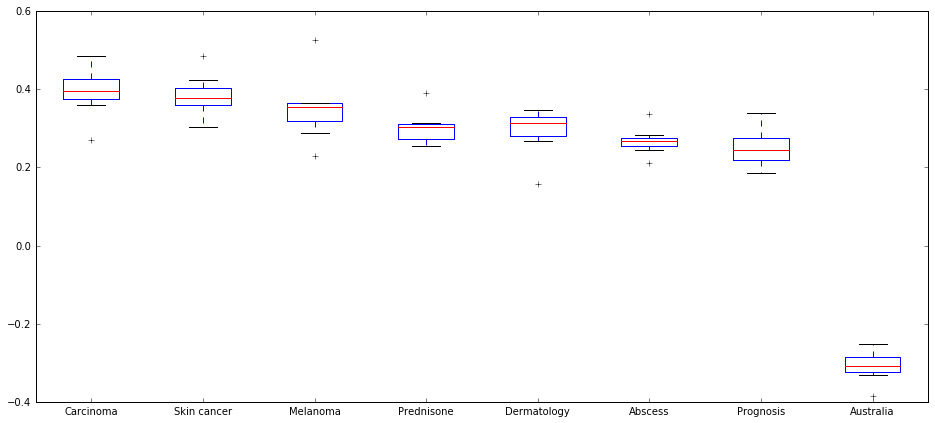

In [11]:
CORR.plot(kind='box', figsize=[16,7])
plt.show()

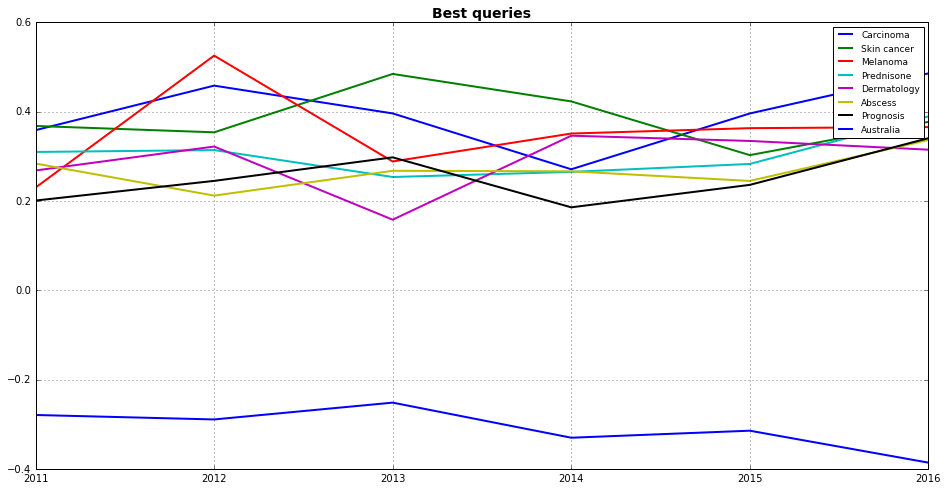

In [12]:
plt.figure(figsize=(16, 8))
plt.plot(CORR.iloc[:-1,:], linewidth = 2)
plt.title('Best queries',fontsize=14, fontweight='bold')
plt.legend(CORR.columns, prop={'size': 9})
plt.xticks(years,years)
plt.grid()
plt.show()


#### The "best queries" plot still show the discrepancy of continuity for queries like Melanoma, which has  a peak in the 2012 axis.

#### We are still dealing with crude prevalence GT data but in the following portion of code there is the correlation analysis for each state over the years with the GT target.

#### This time we will consider correlations between the vector of years (taking all years values for each state) for each query and the corresponding on the GT. We will take all those queries with the highest correlation value with the same logical reasoning applied above regarding categories, in fact the queries selected this time are not the same of the last study correlation carried out above.

In [13]:
CStemp = Correlation_Study(categories, cat_names, path, states)

# we first build the correlation matrix
cm = CStemp.corr_temp(GT,GoogleTrends,states)

# we then want to save only the keywords where the average correlation is higher than 0.25
kws = CStemp.cat(threshold = 0.25)

# we can then have the new correlation matrix
cm2 = CStemp.newcorr(temp=True)

# and we can finally save the new data
CORRtemp = CStemp.newdf_temp('temp')

# let's sort the queries
CORRtemp = CORRtemp.T.sort_values('Mean (by query)', ascending = False).T

In [14]:
CORRtemp

,Folliculitis,Prednisone,Gene,Cellulitis,Dermatology,Protein,Chemotherapy,Contact dermatitis,Onychomycosis,Tumor,white spots,Food and Drug Administration,Biopsy,MRI,EMedicine,Interferon,sunburn
State,,,,,,,,,,,,,,,,,
Alabama,0.741867,0.821758,-0.917895,0.743558,0.588506,0.013538,0.848072,0.531520,0.184457,0.464144,-0.227876,0.123955,-0.369304,-0.333767,-1.053844e-01,-0.620579,-0.393633
Alaska,0.505129,-0.208683,-0.019146,0.391710,-0.344315,-0.367042,-0.045511,NaN,NaN,-0.459439,0.037759,-0.346084,-0.351528,-0.793518,6.468734e-01,NaN,0.184499
Arizona,0.829429,0.487945,0.666286,0.444670,0.583701,0.822595,0.835147,0.757863,0.547679,0.864539,-0.745981,-0.783484,-0.552137,-0.283659,5.086790e-02,-0.927258,-0.336694
Arkansas,-0.296798,0.980786,0.381365,0.049137,0.565970,0.353655,0.441877,-0.291145,-0.190996,0.300256,0.050294,-0.667676,-0.252336,-0.725604,-9.546467e-02,-0.320888,-0.509522
California,-0.721674,-0.704449,-0.303421,-0.176390,-0.633033,-0.920609,-0.783280,-0.652297,-0.516043,-0.636050,0.720290,0.416247,0.006056,0.238088,-3.915605e-01,0.590747,0.538733
Colorado,0.631708,0.220242,0.934199,0.639412,0.825994,0.818182,0.852803,0.845428,0.439281,0.917329,-0.736855,0.043662,0.134212,0.064131,-1.710631e-01,0.356783,-0.937414
Connecticut,0.632820,-0.276827,-0.242510,0.456533,-0.255115,0.206997,-0.074439,-0.103398,-0.219404,-0.448804,-0.443928,0.542697,-0.186248,-0.079802,9.374498e-01,0.583793,0.065047
Delaware,0.925077,-0.144895,0.804521,0.530190,0.495658,0.088092,-0.168375,0.072352,NaN,0.276804,0.346724,-0.690624,-0.562159,0.549295,-3.528362e-01,-0.538721,-0.035738
District of Columbia,0.877006,0.431526,0.472315,0.930999,0.331970,0.347857,0.435973,0.651658,0.730740,0.475998,-0.489044,-0.687301,-0.948040,-0.616372,-6.261233e-02,-0.968400,-0.631775


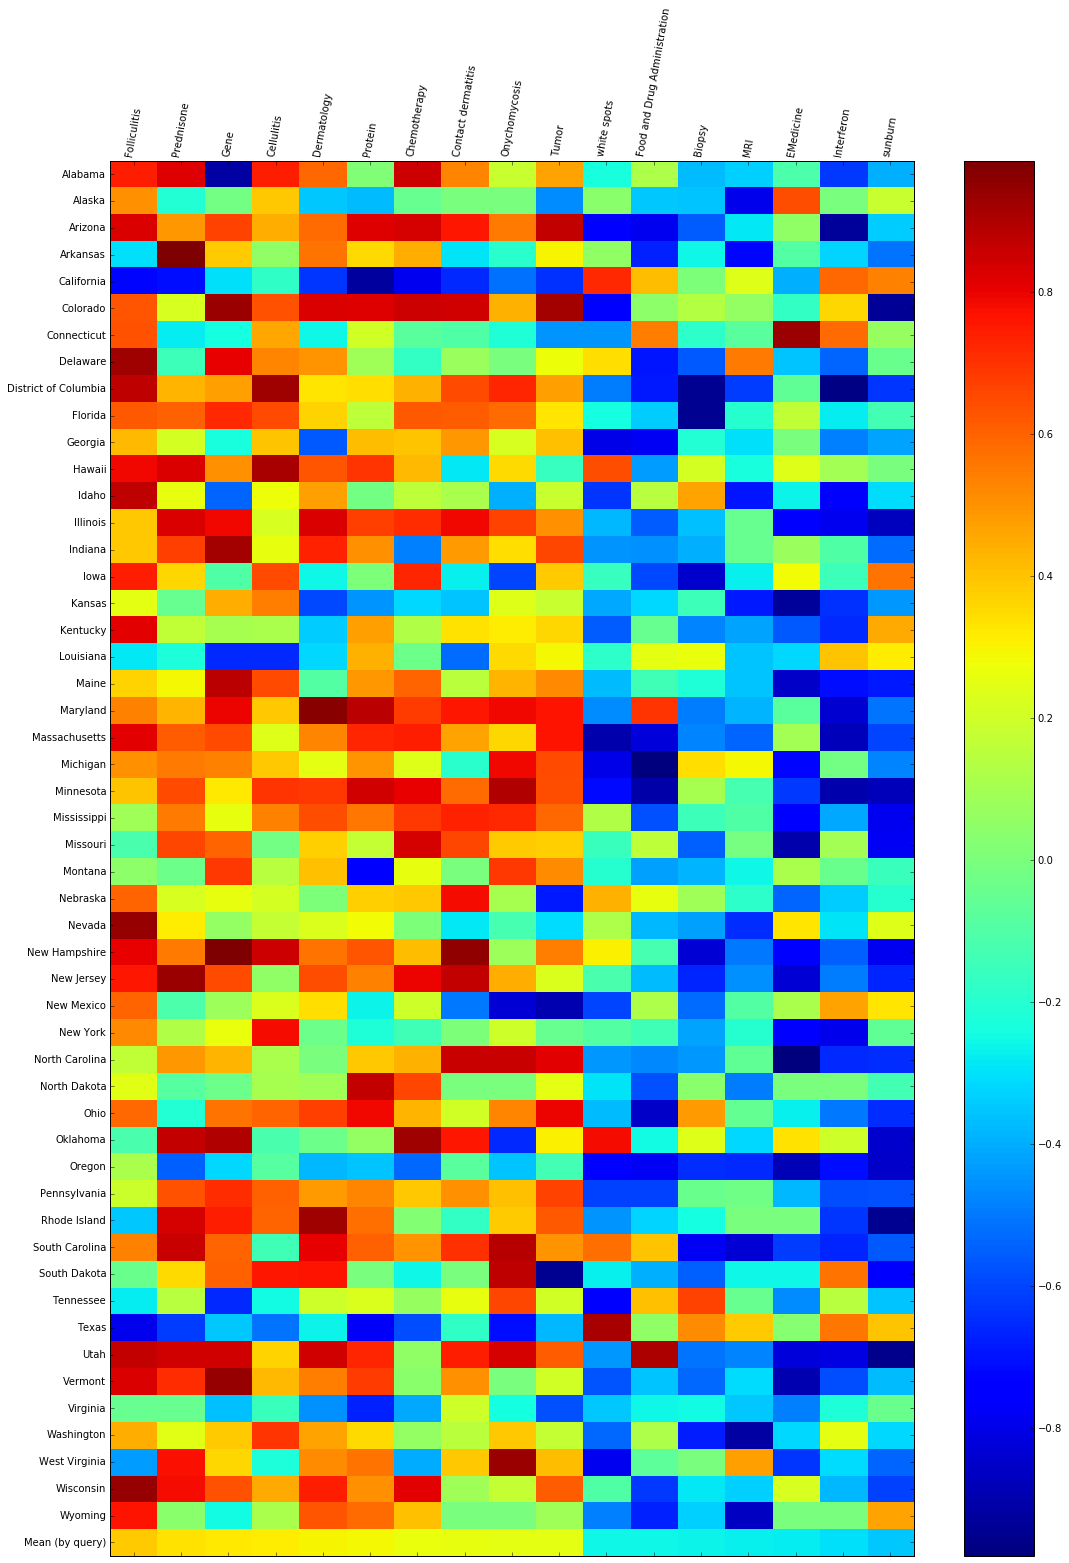

In [15]:
fig = plt.figure(figsize=(18, 25))
ax = fig.add_subplot(111)
cax = ax.matshow(CORRtemp.fillna(0).values, interpolation='nearest', aspect="auto")  
fig.colorbar(cax)

ax.set_xticks(list(range(len(CORRtemp.columns))))
ax.set_yticks(list(range(len(CORRtemp.index))))
ax.set_xticklabels(list(CORRtemp.columns))  
ax.set_yticklabels(list(CORRtemp.index))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=80)
plt.show()

In [16]:
print("Correlation range : ",CORRtemp.fillna(0).values.min(),CORRtemp.fillna(0).values.max())

Correlation range :  -0.979446662734 0.984999149777


#### The correlation range in this case is almost one so there is a huge variability in terms of correlation between the vector of each query over the state, taking the average over the 6 years. In the previous plot there is not continuity considering queries( columns ), there is just prevalence of red on the left part  and blue prevalence on the right part of the plot, underlying the variability of correlation coefficients  comparing same query in different states.

#### Since there is a variability among states, we tried to find clusters by states to reach  a better homogeneous behavoiur for all the queries but we didn't get good results. 

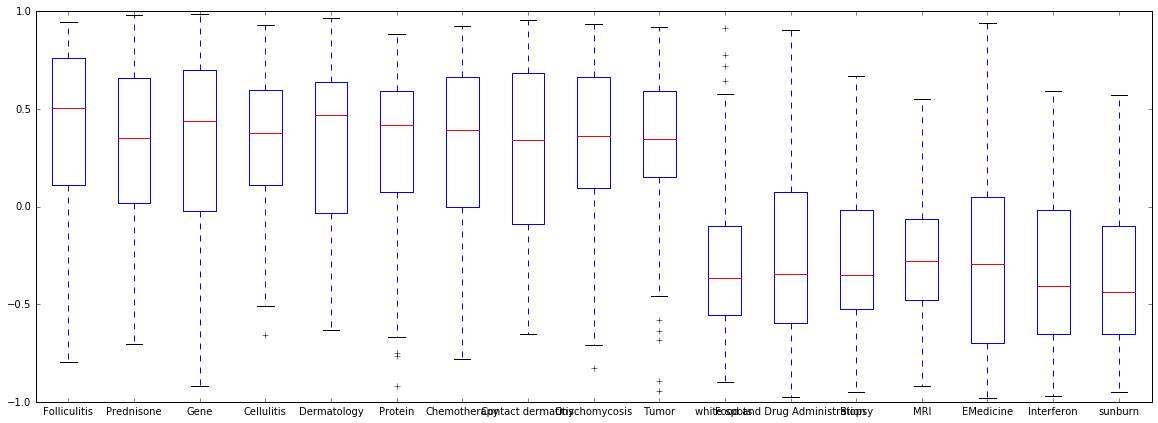

In [17]:
CORRtemp.plot(kind='box', figsize=[20,7])
plt.show()

In [18]:
#final tables to use for the models

writer = pd.ExcelWriter(path+'GoogleTrends/QUERIES(new)_union.xlsx')
for year in range(len(years)):
    df = pd.read_excel(path+'GoogleTrends/QUERIES(new).xlsx', sheetname = year)
    df = df.set_index('LocationDesc')
    dftemp = pd.read_excel(path+'GoogleTrends/QUERIES(new)temp.xlsx', sheetname = year)
    dftemp = dftemp.set_index('LocationDesc')
    union = pd.concat([df,dftemp], axis = 1)
    union.to_excel(writer, sheet_name = str(years[year]), index = True)
writer.save()

### AGE ADJUSTED PREVALENCE

#### we continued  using GT skin cancer data considering the entry  called "age adjusted prevalence". The precedure is exactly the same described before.

In [19]:
CS2 = Correlation_Study(categories, cat_names, path, states, GroundTruth = GT2)

# we first build the correlation matrix
cm = CS2.corr()

# we then want to save only the keywords where the average correlation is higher than 0.2
kws = CS2.cat(threshold = 0.20)

# we can then have the new correlation matrix
cm2 = CS2.newcorr()

# and we can finally save the new data
CORR2 = CS2.newdf('2')

# let's sort the queries
CORR2 = CORR2.T.sort_values('Mean (by query)', ascending = False).T

In [20]:
CORR2

,Skin cancer,Dermatology,Carcinoma,Melanoma,Abscess,Food and Drug Administration,Latin America,Australia
2011,0.227207,0.262728,0.218837,0.100690,0.207635,-0.459213,-0.129260,-0.226382
2012,0.431256,0.316190,0.333505,0.427377,0.148233,-0.096100,-0.173128,-0.253515
2013,0.317416,0.171597,0.289124,0.182010,0.213220,-0.405506,-0.304618,-0.222271
2014,0.274496,0.315074,0.133409,0.281084,0.212758,-0.242954,-0.323260,-0.269813
2015,0.289279,0.332511,0.276692,0.249153,0.198120,-0.132527,-0.256396,-0.279806
2016,0.250608,0.335151,0.425283,0.287732,0.277133,-0.079738,-0.261994,-0.356988
Mean (by query),0.298377,0.288875,0.279475,0.254674,0.209517,-0.236006,-0.241443,-0.268129


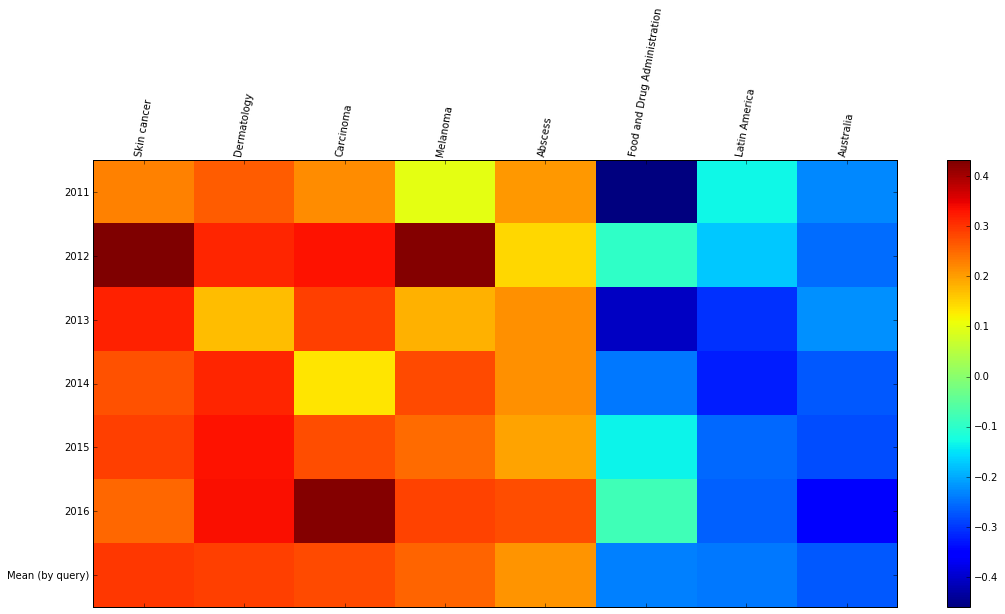

Range correlation 0.431256477625 -0.459213065545


In [21]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(CORR2.values, interpolation='nearest', aspect="auto")  
fig.colorbar(cax)

ax.set_xticks(list(range(len(CORR2.columns))))
ax.set_yticks(list(range(len(CORR2.index))))
ax.set_xticklabels(list(CORR2.columns))  
ax.set_yticklabels(list(CORR2.index))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=80)
plt.show()

print("Range correlation",CORR2.values.max(), CORR2.values.min())

#### The correlation considering the age adjusted prevalence indicator is characterized by low absolute correlation coefficients. In some years like 2015 can be observed some continuity over the queries, considering each query over the years, the most stable query is Abscess.

#### Another curious aspect is the presence of another nation apart from Australia, that's Latin America with negative correlation exactly like Australia. Food and Drug Administration query and melanoma are most  instable queries considered, as shown in the following plot.

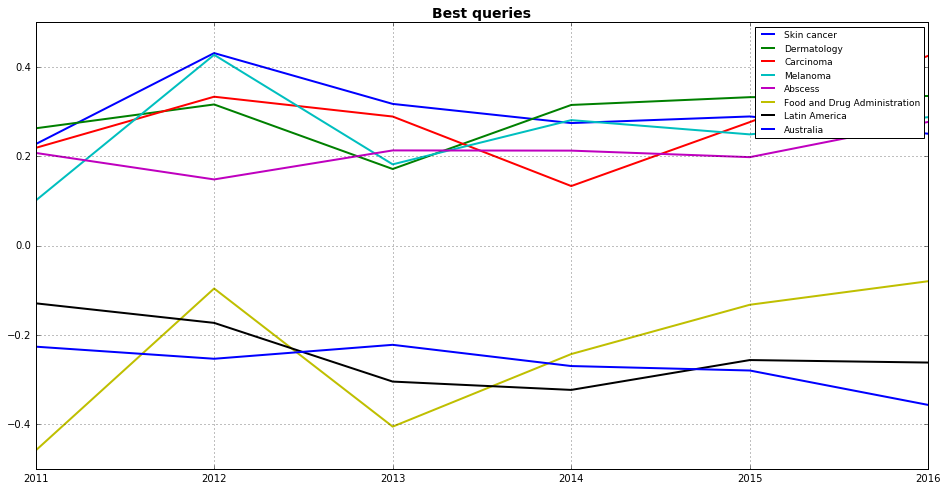

In [22]:
plt.figure(figsize=(16, 8))
plt.plot(CORR2.iloc[:-1,:], linewidth = 2)
plt.title('Best queries',fontsize=14, fontweight='bold')
plt.legend(CORR2.columns, prop={'size': 9})
plt.xticks(years,years)
plt.grid()
plt.show()

In [23]:
CStemp2 = Correlation_Study(categories, cat_names, path, states)

# we first build the correlation matrix
cm = CStemp2.corr_temp(GT2,GoogleTrends,states)

# we then want to save only the keywords where the average correlation is higher than 0.2
kws = CStemp2.cat(threshold = 0.2)

# we can then have the new correlation matrix
cm2 = CStemp2.newcorr(temp=True)

# and we can finally save the new data
CORRtemp2 = CStemp2.newdf_temp('2temp')

# let's sort the queries
CORRtemp2 = CORRtemp2.T.sort_values('Mean (by query)', ascending = False).T

In [24]:
CORRtemp2

,Cellulitis,Prednisone
State,,
Alabama,0.312464,0.631829
Alaska,-0.145562,-0.565569
Arizona,0.405318,0.392711
Arkansas,-0.015216,0.950990
California,-0.219644,-0.769043
Colorado,0.114568,0.832876
Connecticut,-0.456992,-0.425385
Delaware,0.167092,0.059487
District of Columbia,0.882242,0.434799


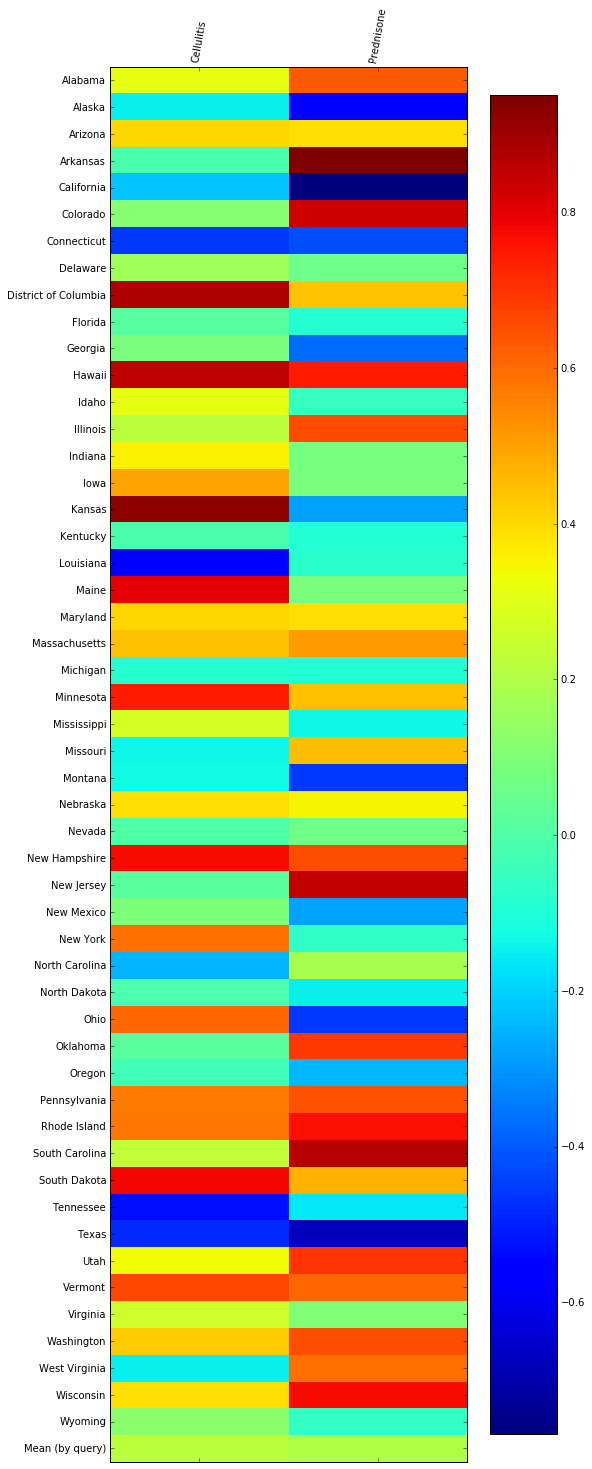

In [25]:
fig = plt.figure(figsize=(8, 25))
ax = fig.add_subplot(111)
cax = ax.matshow(CORRtemp2.values, interpolation='nearest', aspect="auto")  
fig.colorbar(cax)

ax.set_xticks(list(range(len(CORRtemp2.columns))))
ax.set_yticks(list(range(len(CORRtemp2.index))))
ax.set_xticklabels(list(CORRtemp2.columns))  
ax.set_yticklabels(list(CORRtemp2.index))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=80)
plt.show()

In [26]:
writer = pd.ExcelWriter(path+'GoogleTrends/QUERIES(new)2_union.xlsx')
for year in range(len(years)):
    df = pd.read_excel(path+'GoogleTrends/QUERIES(new)2.xlsx', sheetname = year)
    df = df.set_index('LocationDesc')
    dftemp = pd.read_excel(path+'GoogleTrends/QUERIES(new)2temp.xlsx', sheetname = year)
    dftemp = dftemp.set_index('LocationDesc')
    union = pd.concat([df,dftemp], axis = 1)
    union.to_excel(writer, sheet_name = str(years[year]), index = True)
writer.save()

#  1.2 - Download US state-level data on income and poverty from the US Census Bureau. The data is available at: https://www.census.gov/data/tables/2017/demo/income-poverty/p60-259.html Study the correlation of your target ground truth feature with income/poverty features.


### CRUDE PREVALENCE

In [27]:
CORR = []

for year in range(len(years)):
    
    df = pd.read_excel(path+'Poverty/Poverty.xlsx', sheet=year)
    df = df.set_index('STATE')
    m = pd.merge(GT.loc[states,[str(years[year])]], df, how = 'left', left_index = True, right_index = True)
    m = m[[str(years[year]),'Percent']]
    m = m.fillna(m.median())
        #calculate correlation 
    CORR += [np.corrcoef(m, rowvar = False)[0][1]]
    #print(np.corrcoef(m, rowvar = False))

d = {str(y): [c] for y,c in zip(years,CORR)}
d['Mean'] = [np.mean(CORR)]
d = pd.DataFrame(d, columns = list(map(str,years))+['Mean'])
print('Poverty indicators year by year:')
d

Poverty indicators year by year:


,2011,2012,2013,2014,2015,2016,Mean
0,0.243319,0.293486,0.170467,0.16668,0.175301,0.175496,0.204125


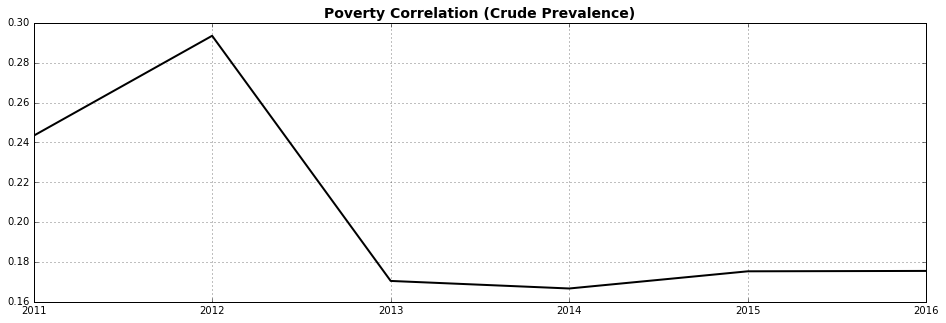

In [28]:
plt.figure(figsize=(16, 5))
plt.plot(d.T.iloc[:-1,:], linewidth = 2, color = 'black')
plt.title('Poverty Correlation (Crude Prevalence)',fontsize=14, fontweight='bold')
plt.xticks(years,years)
plt.grid()
plt.show()

### AGE ADJUSTED

In [29]:
CORR = []
for year in range(len(years)):
    df = pd.read_excel(path+'Poverty/Poverty.xlsx', sheet=year)
    df = df.set_index('STATE')
    m = pd.merge(GT2.loc[states,[str(years[year])]], df, how = 'left', left_index = True, right_index = True)
    m = m[[str(years[year]),'Percent']]
    #print(m)
    m = m.fillna(m.median())
    CORR += [np.corrcoef(m, rowvar = False)[0][1]]

d = {str(y): [c] for y,c in zip(years,CORR)}
d['Mean'] = [np.mean(CORR)]
d = pd.DataFrame(d, columns = list(map(str,years))+['Mean'])
d

,2011,2012,2013,2014,2015,2016,Mean
0,0.251361,0.315281,0.185028,0.176608,0.194725,0.15855,0.213592


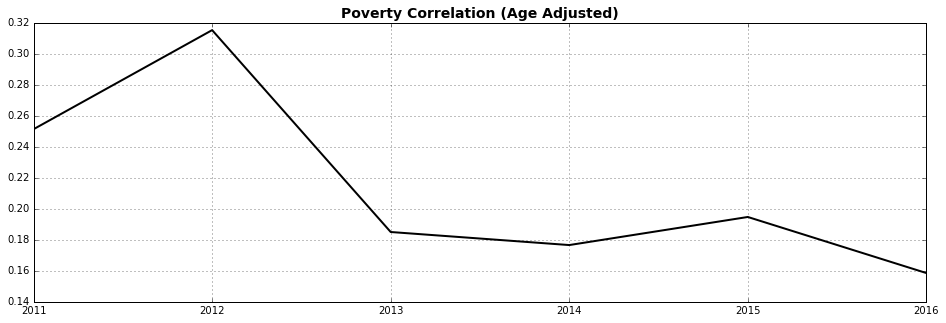

In [30]:
plt.figure(figsize=(16, 5))
plt.plot(d.T.iloc[:-1,:], linewidth = 2, color = 'black')
plt.title('Poverty Correlation (Age Adjusted)',fontsize=14, fontweight='bold')
plt.xticks(years,years)
plt.grid()
plt.show()

# HEALTH INSURANCE COVERAGE 

### CRUDE PREVALENCE

In [31]:
HIC = pd.DataFrame(index = states)
for y in years: 
    df = pd.read_csv(path+'Insurance/HealthCareCoverage_'+str(y)+'.csv')
    #df = df.replace('*',np.nan)
    df['Data_Value'] = pd.to_numeric(df['Data_Value'])
    df = df.set_index('LocationDesc')
    HIC[str(y)] = df['Data_Value'][df['Data_Value'].notnull()]

In [32]:
CORR = []
for year in range(len(years)):
    m = pd.merge(GT.loc[states,[str(years[year])]], HIC.loc[states,[str(years[year])]], how = 'left', 
                 left_index = True, right_index = True)
    m = m[[str(years[year])+'_x',str(years[year])+'_y']]
    #print(m)
    m = m.fillna(m.median())
    CORR += [np.corrcoef(m, rowvar = False)[0][1]]

d = {str(y): [c] for y,c in zip(years,CORR)}
d['Mean'] = [np.mean(CORR)]
d = pd.DataFrame(d, columns = list(map(str,years))+['Mean'])
d

,2011,2012,2013,2014,2015,2016,Mean
0,-0.329271,-0.351052,-0.328313,-0.115713,-0.072964,-0.171354,-0.228111


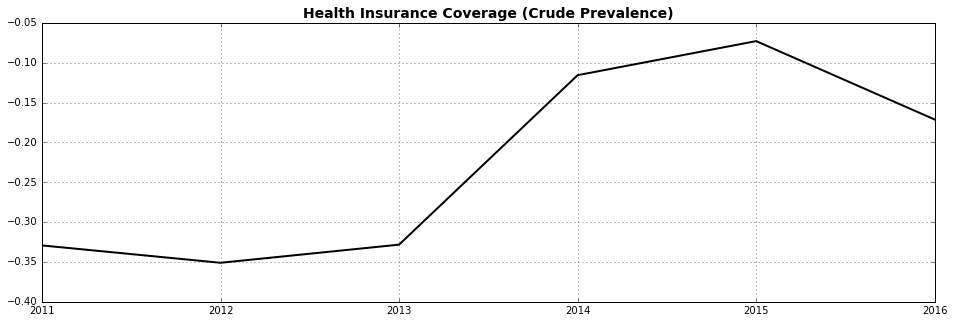

In [33]:
plt.figure(figsize=(16, 5))
plt.plot(d.T.iloc[:-1,:], linewidth = 2, color = 'black')
plt.title('Health Insurance Coverage (Crude Prevalence)',fontsize=14, fontweight='bold')
plt.xticks(years,years)
plt.grid()
plt.show()

### AGE ADJUSTED

In [34]:
HIC2 = pd.DataFrame(index = states)
for y in years: 
    df = pd.read_csv(path+'Insurance/HealthCareCoverage2_'+str(y)+'.csv')
    #df = df.replace('*',np.nan)
    df['Data_Value'] = pd.to_numeric(df['Data_Value'])
    df = df.set_index('LocationDesc')
    HIC2[str(y)] = df['Data_Value'][df['Data_Value'].notnull()]

In [35]:
CORR = []
for year in range(len(years)):
    m = pd.merge(GT2.loc[states,[str(years[year])]], HIC2.loc[states,[str(years[year])]], how = 'left', 
                 left_index = True, right_index = True)
    m = m[[str(years[year])+'_x',str(years[year])+'_y']]
    #print(m)
    m = m.fillna(m.median())
    CORR += [np.corrcoef(m, rowvar = False)[0][1]]

d = {str(y): [c] for y,c in zip(years,CORR)}
d['Mean'] = [np.mean(CORR)]
d = pd.DataFrame(d, columns = list(map(str,years))+['Mean'])
d

,2011,2012,2013,2014,2015,2016,Mean
0,-0.458504,-0.486705,-0.462793,-0.266798,-0.1968,-0.290524,-0.360354


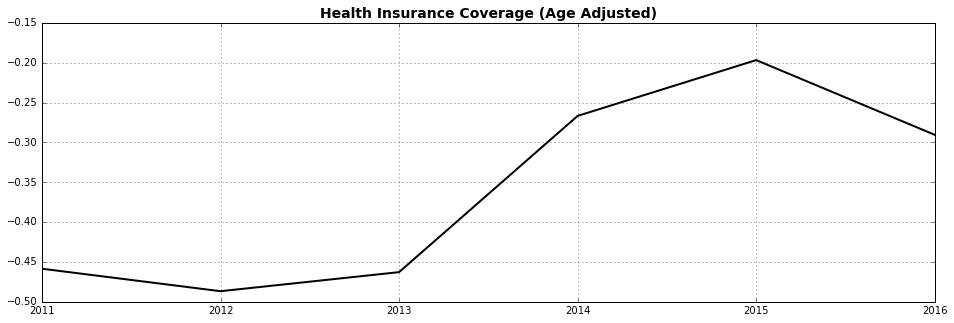

In [36]:
plt.figure(figsize=(16, 5))
plt.plot(d.T.iloc[:-1,:], linewidth = 2, color = 'black')
plt.title('Health Insurance Coverage (Age Adjusted)',fontsize=14, fontweight='bold')
plt.xticks(years,years)
plt.grid()
plt.show()

#### The correlation coefficients between the poverty percentage over the states, for each year, and the GT variable are between 0.17 and 0.29. There is not that much variability since the window of coefficients is less than 0.10 but results are  coherent since the correlation with target is positive, that means the poverty percentage  is directly proportional to the percentage of skin cancer. However correlations are not high enough to guarantee good results in our models or add enough information to improve them, as we are going to see in the last notebook with the models.

####  In case of health insurance coverage there is a coherent result in terms of correlation, since is negative. Since we downloaded data from the same source of ground truth data, we could find an "age adjusted" dataset, comparable with our target variable. This is the only case in which correlation with age adjusted GT data reaches in absolute value 0.46.
